# European House Pricing Prediction

This notebook analyzes a dataset containing housing market data from multiple European countries.
Sourced directly from Eurostat's official statistics, this dataset provides reliable economic indicators for real estate analysis, forecasting, and comparative studies. In the specific i would like to build predictive models capable of forecasting housing prices.

## Problem Statement

Understanding and forecasting housing prices is a key challenge for economists and policy analysts, as real estate markets play a central role in economic stability and household wealth. This project addresses the needs of:
- economists studying European real estate markets
- analysts comparing housing trends across different countries
- practitioners developing forecasting models and predictive analytics.

## Dataset Overview & Data Exploration

In any Machine Learning project, the Data Overview phase is not merely a preliminary step but the analytical foundation upon which the entire predictive system is built. The effectiveness of a model does not depend solely on the complexity of the chosen algorithm, but rather on the nature, quality, and integrity of the data used to train it. Conducting a thorough overview of the data types (numerical, categorical, ordinal, or textual) is essential for three primary reasons:
- **Technical Constraint Identification**: Each data type requires specific preprocessing—such as normalization for numerical values or encoding for categorical variables—to ensure the algorithm can process them mathematically.
- **Error Mitigation (Garbage In, Garbage Out)**: Early detection of missing values, duplicates, or outliers allows for corrective action before these anomalies compromise the model's performance and reliability.
- **Domain Understanding**: Analyzing the distribution and characteristics of variables helps validate business hypotheses and ensures that the dataset is truly representative of the real-world scenario the model aims to simulate.

In [75]:
import numpy as np
import pandas as pd

house_dataset = pd.read_csv("~/Desktop/work_project/housing_price_pred/european_housing_prices_clean.csv")

house_dataset.info()

house_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      417 non-null    object 
 1   country_type                 417 non-null    object 
 2   eu_member                    357 non-null    object 
 3   eurozone_member              357 non-null    object 
 4   year                         417 non-null    int64  
 5   quarter_num                  417 non-null    int64  
 6   quarter                      417 non-null    object 
 7   price_index                  405 non-null    float64
 8   quarterly_change_pct         417 non-null    float64
 9   yearly_change_pct            417 non-null    float64
 10  price_change_since_2015_pct  405 non-null    float64
 11  data_quality                 417 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 39.2+ KB


,year,quarter_num,price_index,quarterly_change_pct,yearly_change_pct,price_change_since_2015_pct
count,417.000000,417.000000,405.000000,417.000000,417.000000,405.000000
mean,2023.741007,2.503597,201.283012,1.276499,6.317506,101.283012
std,0.922513,1.120444,192.360171,2.698651,14.530613,192.360171
min,2022.000000,1.000000,98.280000,-6.600000,-14.500000,-1.720000
25%,2023.000000,2.000000,145.800000,-0.100000,1.100000,45.800000
50%,2024.000000,3.000000,164.250000,1.200000,4.700000,64.250000
75%,2024.000000,4.000000,203.620000,2.400000,8.400000,103.620000
max,2025.000000,4.000000,1884.940000,22.700000,170.500000,1784.940000


We can see that the target variable, 'price_index', has an average of 201,283, the minimum is 98,280, and the maximum is 1,884,940. The fact that the maximum price deviates significantly from the average means that there are outliers that need to be addressed.

In [43]:
house_dataset.head()

print(house_dataset.isnull().sum())

country                         0
country_type                    0
eu_member                      60
eurozone_member                60
year                            0
quarter_num                     0
quarter                         0
price_index                    12
quarterly_change_pct            0
yearly_change_pct               0
price_change_since_2015_pct    12
data_quality                    0
dtype: int64


The dataset consists of 417 records and 12 columns (including the target variable), described as follows:
- **Country**: The name of the nation (Categorical feature).
- **Country_type**: Indicates if the record is 'individual' (a single nation) or 'aggregate' (combined statistical values for groups of countries, such as the EU) (Categorical feature).
- **eu_member**: Indicates whether the country is a member of the European Union ('yes'/'no') (Categorical feature).
- **eurozone_member**: Indicates whether the country uses the Euro as its currency ('yes'/'no') (Categorical feature).
- **year**: An integer representing the year the data refers to (Numerical feature).
- **quarter_num**: An integer (1–4) representing the specific quarter of the year.
- **quarter**: A string combining the year and the quarter number (e.g., "2023-Q1").
- **price_index**: The house price expressed in thousands of Euros (Numerical feature). 
- **quarterly_change_pct**: The percentage change in price compared to the previous quarter (QoQ).
- **yearly_change_pct**: The percentage change in price compared to the same quarter of the previous year (YoY).
- **price_change_since_2015_pct**: The cumulative percentage change in price since the base year 2015.
- **data_quality**: A metadata column indicating the statistical reliability of the record (e.g., High, Medium, Low).

In [50]:
stati_reali = house_dataset[house_dataset['country_type'] == 'Individual']['country'].nunique()
states_aggr = house_dataset[house_dataset['country_type'] == 'Aggregate']['country'].nunique()
country_type = house_dataset['country_type'].nunique()
year = house_dataset['year'].nunique()
year_quartiles = house_dataset['quarter_num'].nunique()

print(f"Nel dataset ci sono {country_type} tipologie di stati, {stati_reali} sono stati individuali e {states_aggr} sono stati aggregati. \n"
      f"I dati si riferiscono a {year} anni. Ogni anno è diviso in {year_quartiles} parti")

Nel dataset ci sono 2 tipologie di stati, 30 sono stati individuali e 5 sono stati aggregati. 
I dati si riferiscono a 4 anni. Ogni anno è diviso in 4 parti


## Data Visualization

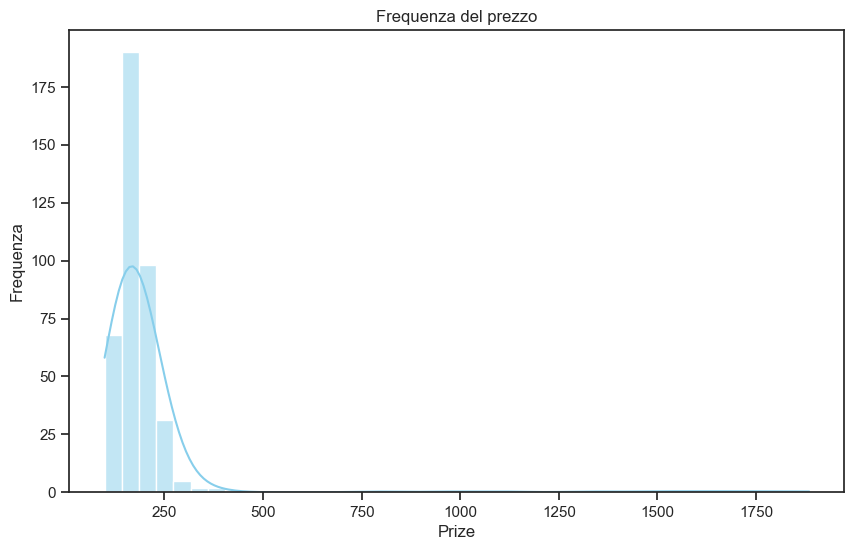

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

plt.figure(figsize=(10, 6))
sns.histplot(house_dataset['price_index'], kde=True, color='skyblue')
plt.xlabel("Prize")
plt.ylabel("Frequenza")
plt.title("Frequenza del prezzo")
plt.show()

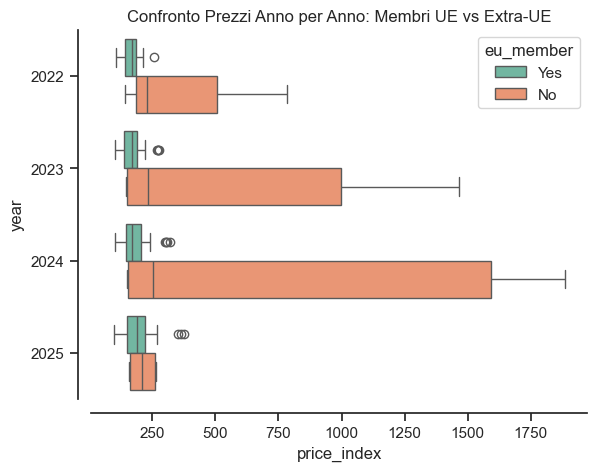

In [74]:
sns.boxplot(
    x="price_index", 
    y=house_dataset["year"].astype(str), 
    hue="eu_member", # <--- Aggiunge il confronto a colori
    data=house_dataset,
    palette="Set2"
)
plt.title("Confronto Prezzi Anno per Anno: Membri UE vs Extra-UE")
sns.despine(offset=10)
plt.show()